In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\SANDEEP YADAV\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pickle_in=open('pickle_data.pickle','rb')
data=pickle.load(pickle_in)
pickle_in.close()
data.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
10393,0.83,0.77,3,260,2,0,0,0,0,1
7821,0.42,0.41,5,240,2,0,0,0,1,1
10725,0.52,0.55,3,225,2,0,0,0,1,0
3194,0.57,0.65,5,177,2,0,0,0,1,2
1601,0.68,0.62,5,198,5,1,1,0,1,0


In [3]:
X = data.loc[:, data.columns != 'left']
Y = data.loc[:, data.columns == 'left']
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=5)

In [4]:
print(Y_test[Y_test['left']==1].count())

left    694
dtype: int64


In [5]:
classifier_f = open("svm_svc.pickle", "rb")
svm_SVC = pickle.load(classifier_f)
classifier_f.close()

In [6]:
classifier_f = open("logistic_model.pickle", "rb")
logistic_model = pickle.load(classifier_f)
classifier_f.close()

In [7]:
classifier_f = open("decision_tree.pickle", "rb")
decision_tree = pickle.load(classifier_f)
classifier_f.close()

In [8]:
classifier_f = open("adaboost.pickle", "rb")
adaboost = pickle.load(classifier_f)
classifier_f.close()

In [9]:
classifier_f = open("random_forest.pickle", "rb")
random_forest = pickle.load(classifier_f)
classifier_f.close()

In [10]:
classifier_f = open("random_forest_updated.pickle", "rb")
random_forest_updated = pickle.load(classifier_f)
classifier_f.close()

In [11]:
classifier_f = open("adaboost_updated.pickle", "rb")
adaboost_updated = pickle.load(classifier_f)
classifier_f.close()

In [12]:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values

# SVM.SVC Classifier

Accuracy of the algorithm:  0.952666666667
Precison of the algorithm:  0.876021798365
Recall of the algorithm:  0.9265129683
F1_Score of the algorithm:  0.90056022409
Total number of employees which are likely to leave:  734


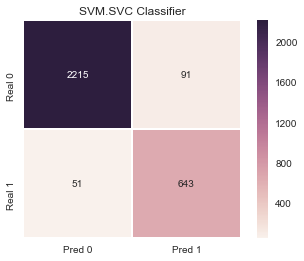

In [13]:
svm_prediction = svm_SVC.predict(test_features)

acc = accuracy_score(Y_test, svm_prediction)
precision = precision_score(Y_test, svm_prediction)
recall = recall_score(Y_test, svm_prediction)
f1score = f1_score(Y_test, svm_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(svm_prediction))


ax = plt.axes()
ax.set_title("SVM.SVC Classifier")

df_cm=pd.DataFrame(confusion_matrix(Y_test, svm_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Logistic Regression

Accuracy of the algorithm:  0.788666666667
Precison of the algorithm:  0.579365079365
Recall of the algorithm:  0.315561959654
F1_Score of the algorithm:  0.408582089552
Total number of employees which are likely to leave:  378


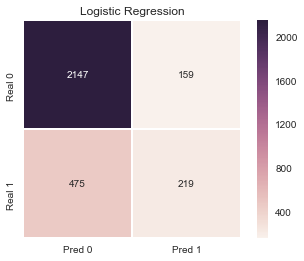

In [14]:
lg_prediction = logistic_model.predict(test_features)

acc = accuracy_score(Y_test, lg_prediction)
precision = precision_score(Y_test,lg_prediction)
recall = recall_score(Y_test, lg_prediction)
f1score = f1_score(Y_test, lg_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(lg_prediction))

ax = plt.axes()
ax.set_title("Logistic Regression")

df_cm=pd.DataFrame(confusion_matrix(Y_test, lg_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Decision Tree Classifier

Accuracy of the algorithm:  0.976666666667
Precison of the algorithm:  0.928571428571
Recall of the algorithm:  0.974063400576
F1_Score of the algorithm:  0.950773558368
Total number of employees which are likely to leave:  728
[  4.89785469e-01   1.48884429e-01   1.04411644e-01   9.68792017e-02
   1.45872776e-01   2.62403017e-03   2.34384400e-05   4.85230056e-03
   6.66671133e-03]


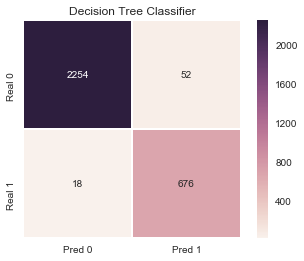

In [15]:
dt_prediction = decision_tree.predict(test_features)

acc = accuracy_score(Y_test, dt_prediction)
precision = precision_score(Y_test, dt_prediction)
recall = recall_score(Y_test, dt_prediction)
f1score = f1_score(Y_test, dt_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(dt_prediction))

print(decision_tree.feature_importances_ )



ax = plt.axes()
ax.set_title("Decision Tree Classifier")

df_cm=pd.DataFrame(confusion_matrix(Y_test, dt_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Random Forest

Accuracy of the algorithm:  0.986333333333
Precison of the algorithm:  0.993948562784
Recall of the algorithm:  0.946685878963
F1_Score of the algorithm:  0.969741697417
Total number of employees which are likely to leave:  661
[ 0.33523165  0.1179957   0.1936789   0.14309664  0.19414823  0.00577633
  0.00079891  0.0024411   0.00683253]


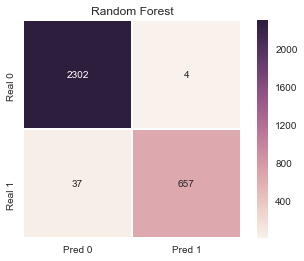

In [16]:
forest_prediction = random_forest.predict(test_features)

acc = accuracy_score(Y_test, forest_prediction)
precision = precision_score(Y_test, forest_prediction)
recall = recall_score(Y_test, forest_prediction)
f1score = f1_score(Y_test, forest_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(forest_prediction))

print(random_forest.feature_importances_)

ax = plt.axes()
ax.set_title("Random Forest")

df_cm=pd.DataFrame(confusion_matrix(Y_test, forest_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Adaboost Classifier

Accuracy of the algorithm:  0.958333333333
Precison of the algorithm:  0.897902097902
Recall of the algorithm:  0.92507204611
F1_Score of the algorithm:  0.911284599006
Total number of employees which are likely to leave:  715
[ 0.27  0.28  0.06  0.24  0.07  0.03  0.01  0.    0.04]


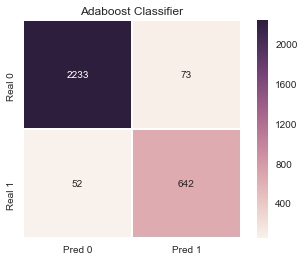

In [17]:
ada_prediction = adaboost.predict(test_features)

acc = accuracy_score(Y_test, ada_prediction)
precision = precision_score(Y_test, ada_prediction)
recall = recall_score(Y_test, ada_prediction)
f1score = f1_score(Y_test, ada_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(ada_prediction))

print(adaboost.feature_importances_)

ax = plt.axes()
ax.set_title("Adaboost Classifier")

df_cm=pd.DataFrame(confusion_matrix(Y_test, ada_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

* Therefore we can canclude that Random Forest and AdaBoost Algorithms performs well.................

# 1. Feature Selection For Random Forest
    Parameters Removed : 
    * promotion_last_5years
    * work_accident
    * salary
    * department

# Final Model Using [Random Forest]

    Parameters Used : 
    * satisfaction_level
    * Last_evaluation                                                                                            
    * Number_project
    * Average_monthly_hours
    * time_spend_company

* Using Random Forest with updated features.

In [18]:
test_features_randomf = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","salary"]].values

Accuracy of the algorithm:  0.986333333333
Precison of the algorithm:  0.99245852187
Recall of the algorithm:  0.948126801153
F1_Score of the algorithm:  0.969786293294
Total number of employees which are likely to leave:  663
[ 0.337759    0.11769339  0.19143987  0.14634088  0.20086925  0.00589761]


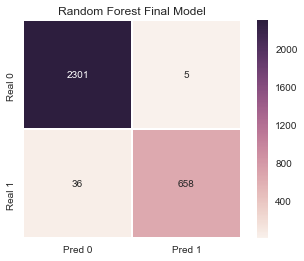

In [19]:
forest1_prediction = random_forest_updated.predict(test_features_randomf)

acc = accuracy_score(Y_test, forest1_prediction)
precision = precision_score(Y_test, forest1_prediction)
recall = recall_score(Y_test, forest1_prediction)
f1score = f1_score(Y_test, forest1_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(forest1_prediction))

print(random_forest_updated.feature_importances_)

ax = plt.axes()
ax.set_title("Random Forest Final Model")

df_cm=pd.DataFrame(confusion_matrix(Y_test, forest1_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# 2. Feature Selection For AdaBoost
    Parameters Removed : 
    * promotion_last_5years
    * work_accident
    * department

# Final Model Using [AdaBoost ]

    Parameters Used : 
    * satisfaction_level
    * Last_evaluation                                                                                            
    * Number_project
    * Average_monthly_hours
    * time_spend_company
    * salary

* Using Adaboost Classifier with updated features...

In [20]:
test_features_adaboost = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company"]].values

Accuracy of the algorithm:  0.958333333333
Precison of the algorithm:  0.904694167852
Recall of the algorithm:  0.916426512968
F1_Score of the algorithm:  0.910522548318
Total number of employees which are likely to leave:  703
[ 0.27  0.28  0.11  0.27  0.07]


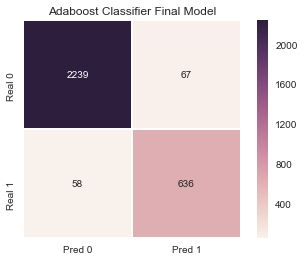

In [21]:
ada1_prediction = adaboost_updated.predict(test_features_adaboost)

acc = accuracy_score(Y_test, ada1_prediction)
precision = precision_score(Y_test, ada1_prediction)
recall = recall_score(Y_test, ada1_prediction)
f1score = f1_score(Y_test, ada1_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(ada1_prediction))

print(adaboost_updated.feature_importances_)

ax = plt.axes()
ax.set_title("Adaboost Classifier Final Model")

df_cm=pd.DataFrame(confusion_matrix(Y_test, ada1_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()